In [1]:
import nltk
import re
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance

In [2]:
with open('data/emails.txt', 'r') as content_file:
    emails = content_file.read()

In [3]:
emails = emails.lower()
emails = re.sub('[^a-zA-Z]', ' ', emails )
emails = re.sub(r'\s+', ' ', emails)


In [4]:
all_sentences = nltk.sent_tokenize(emails)
all_words = [nltk.word_tokenize(sent) for sent in all_sentences]

In [5]:
from nltk.corpus import stopwords
for i in range(len(all_words)):
    all_words[i] = [w for w in all_words[i] if w not in stopwords.words('english')]

In [58]:
word2vec = Word2Vec(all_words,size = 300 ,min_count=2)

In [ ]:
distance(word2vec.wv['retrait'], word2vec.wv['withdrawal'])

In [ ]:
distance(word2vec.wv['pouvoir'], word2vec.wv['power'])

In [ ]:
np.sum(word2vec.wv['son'] - word2vec.wv['daughter'])

In [61]:
distance(word2vec.wv['mail'], word2vec.wv['fax'])

0.025456846

In [22]:
def distance(v1, v2):
    return np.sqrt(np.sum((v1 - v2) ** 2))   

In [77]:
word2vec.wv.similar_by_word("please")

[('contract', 0.6153576970100403),
 ('us', 0.6044713258743286),
 ('nigeria', 0.5919039249420166),
 ('transaction', 0.5881755352020264),
 ('business', 0.5782366991043091),
 ('government', 0.5398640632629395),
 ('assistance', 0.5368225574493408),
 ('family', 0.5322767496109009),
 ('foreign', 0.5312650203704834),
 ('money', 0.5286986231803894)]

In [59]:
def showWords(model, word):
    
    arr = np.empty((0,300), dtype='f')
    word_labels = [word]

    close_words = model.wv.similar_by_word(word, topn = 25)
    
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


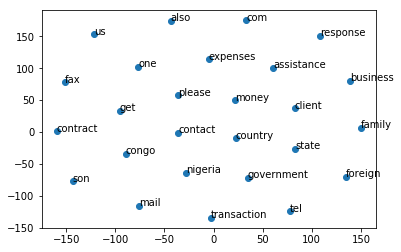

In [73]:
showWords(word2vec, 'son')

In [13]:
with open("data/nostopwords.txt", "w") as text_file:
    text_file.write(stri)

In [10]:
stri = ' '.join(all_words[0])

In [11]:
print(stri)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

